# 1. Pakiety

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

# 2. Dane

In [2]:
df25 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-25.csv')
df25.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-25 04:41:59,77,Teatr Bagatela,4,Bronowice Małe,2018-07-25 04:41:00,6.352185e+18,6351558574044457730,PREDICTED,0,23.0
1,1,2018-07-25 04:41:59,79,Plac Inwalidów,4,Wzgórza K.,2018-07-25 04:41:00,6.352185e+18,6351558574044478210,STOPPING,0,9.0
2,1,2018-07-25 04:42:08,413,Os.Kolorowe,4,Bronowice Małe,2018-07-25 04:41:00,6.352185e+18,6351558574044461826,STOPPING,1,10.0
3,1,2018-07-25 04:42:09,435,Darwina,1,Salwator,2018-07-25 04:41:00,6.352185e+18,6351558574044355330,STOPPING,1,3.0
4,1,2018-07-25 04:42:09,2685,Jarzębiny,4,Bronowice Małe,2018-07-25 04:41:00,6.352185e+18,6351558574044465922,PREDICTED,1,2.0


# Rozkład spóźnień

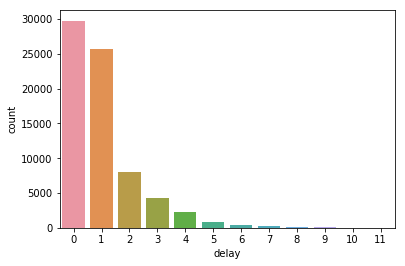

In [3]:
sns.countplot(x='delay', data=df25)

In [4]:
df25.delay.value_counts()

0     29772
1     25762
2      8039
3      4308
4      2222
5       846
6       426
7       241
8       151
9        95
10       28
11        6
Name: delay, dtype: int64

In [5]:
df25.delay.value_counts(normalize = True)

0     0.414098
1     0.358323
2     0.111814
3     0.059920
4     0.030906
5     0.011767
6     0.005925
7     0.003352
8     0.002100
9     0.001321
10    0.000389
11    0.000083
Name: delay, dtype: float64

In [6]:
df25.delay.describe()

count    71896.000000
mean         1.036692
std          1.314104
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         11.000000
Name: delay, dtype: float64

# Spóźnienia w czasie

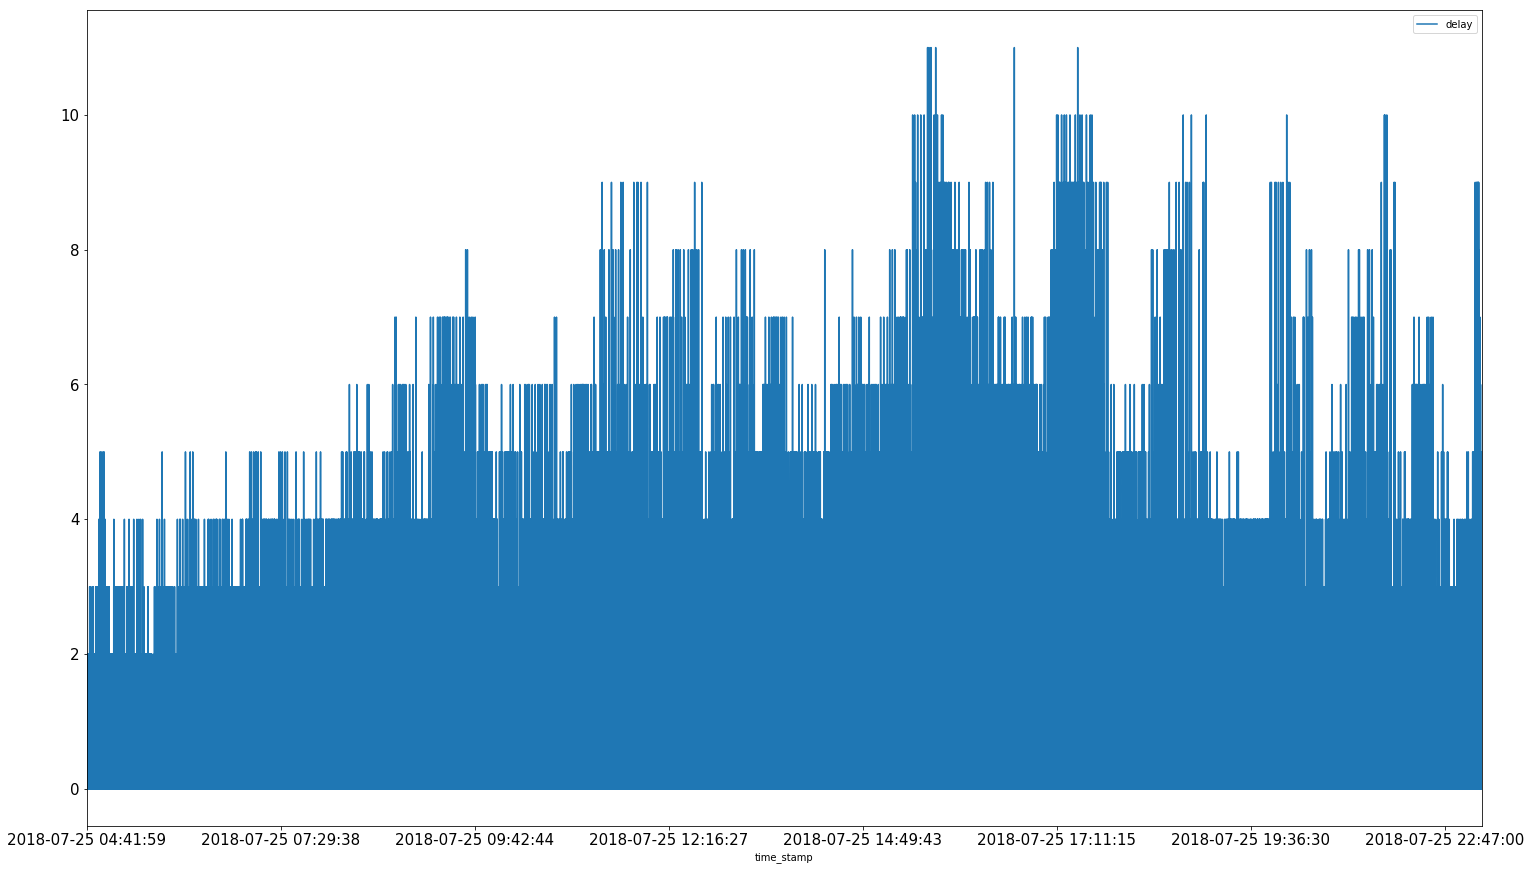

In [7]:
df25.plot(x='time_stamp', y='delay', kind='line', figsize=(25,15), fontsize=15)

# Rankingi spóźnień na przystankach

In [8]:
stopMeanDelay = df25.groupby('stopName').delay.mean().reset_index(name='stopMeanDelay')

In [9]:
stopMeanDelay

,stopName,stopMeanDelay
0,AWF,0.957540
1,Agencja Kraków Wschód,1.500000
2,Bardosa,0.692308
3,Batorego,1.481383
4,Białucha,1.034985
5,Bieńczycka,0.575444
6,Bieżanowska,1.158458
7,Biprostal,1.016064
8,Blokowa,1.350515
9,Borek Fałęcki,0.273743


In [10]:
stopMeanDelay.describe()

,stopMeanDelay
count,153.000000
mean,0.975993
std,0.389095
min,0.018182
25%,0.759259
50%,0.935167
75%,1.216794
max,2.015789


In [11]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False)

,stopName,stopMeanDelay
150,Łagiewniki ZUS,2.015789
75,Nowosądecka,1.877966
88,Piaski Nowe,1.831650
29,Dauna,1.744108
48,Kabel,1.726327
146,Zabłocie,1.644841
31,Dworcowa,1.637908
22,Cmentarz Podgórski,1.596330
79,Ofiar Dąbia,1.592593
95,Plaza,1.581579


In [12]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False).head(10)

,stopName,stopMeanDelay
150,Łagiewniki ZUS,2.015789
75,Nowosądecka,1.877966
88,Piaski Nowe,1.831650
29,Dauna,1.744108
48,Kabel,1.726327
146,Zabłocie,1.644841
31,Dworcowa,1.637908
22,Cmentarz Podgórski,1.596330
79,Ofiar Dąbia,1.592593
95,Plaza,1.581579


In [13]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=True).head(10)

,stopName,stopMeanDelay
23,Cmentarz Rakowicki,0.018182
59,Krowodrza Górka,0.076433
20,Cichy Kącik,0.091837
145,Wzgórza Krzesławickie,0.111732
25,Czerwone Maki P+R,0.151639
67,Mały Płaszów,0.211382
102,Rakowicka,0.263636
14,Bronowice Małe,0.267658
9,Borek Fałęcki,0.273743
138,Walcownia,0.292683


# Ranking spóźnień dla danych linii

In [14]:
lineMeanDelay = df25.groupby(['number', 'direction']).delay.mean().reset_index(name='lineMeanDelay')

In [15]:
lineMeanDelay

,number,direction,lineMeanDelay
0,1,Salwator,0.883012
1,1,Wzgórza K.,0.999567
2,2,Cm. Rakowicki,0.359922
3,2,Salwator,0.620690
4,3,Dworzec Tow.,0.904167
5,3,Krowodrza Górka,0.638918
6,3,Nowy Bieżanów P+R,0.983430
7,4,Bronowice Małe,0.575866
8,4,Kombinat,0.880000
9,4,Wzgórza K.,1.117225


In [16]:
lineMeanDelay.sort_values(by='lineMeanDelay')

,number,direction,lineMeanDelay
20,11,Czerwone Maki P+R,0.240103
2,2,Cm. Rakowicki,0.359922
10,5,Krowodrza Górka,0.379393
7,4,Bronowice Małe,0.575866
44,44,Kombinat,0.583333
3,2,Salwator,0.620690
5,3,Krowodrza Górka,0.638918
43,44,Bronowice,0.639854
33,20,Cichy Kącik,0.659485
19,10,Łagiewniki,0.670946


In [17]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=False).head(10)

,number,direction,lineMeanDelay
40,22,Walcownia,2.060193
41,24,Bronowice Małe,1.792352
42,24,Kurdwanów P+R,1.626364
13,6,Salwator,1.613215
39,22,Kombinat,1.611111
18,10,Kopiec Wandy,1.494536
38,22,Borek Fałęcki,1.486979
47,50,Prokocim,1.482509
23,13,Nowy Bieżanów P+R,1.470830
14,8,Borek Fałęcki,1.361259


In [18]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=True).head(10)

,number,direction,lineMeanDelay
20,11,Czerwone Maki P+R,0.240103
2,2,Cm. Rakowicki,0.359922
10,5,Krowodrza Górka,0.379393
7,4,Bronowice Małe,0.575866
44,44,Kombinat,0.583333
3,2,Salwator,0.620690
5,3,Krowodrza Górka,0.638918
43,44,Bronowice,0.639854
33,20,Cichy Kącik,0.659485
19,10,Łagiewniki,0.670946


In [19]:
lineMeanDelay['number and direction'] = lineMeanDelay.agg('{0[number]} {0[direction]}'.format, axis=1)

In [20]:
lineMeanDelay

,number,direction,lineMeanDelay,number and direction
0,1,Salwator,0.883012,1 Salwator
1,1,Wzgórza K.,0.999567,1 Wzgórza K.
2,2,Cm. Rakowicki,0.359922,2 Cm. Rakowicki
3,2,Salwator,0.620690,2 Salwator
4,3,Dworzec Tow.,0.904167,3 Dworzec Tow.
5,3,Krowodrza Górka,0.638918,3 Krowodrza Górka
6,3,Nowy Bieżanów P+R,0.983430,3 Nowy Bieżanów P+R
7,4,Bronowice Małe,0.575866,4 Bronowice Małe
8,4,Kombinat,0.880000,4 Kombinat
9,4,Wzgórza K.,1.117225,4 Wzgórza K.


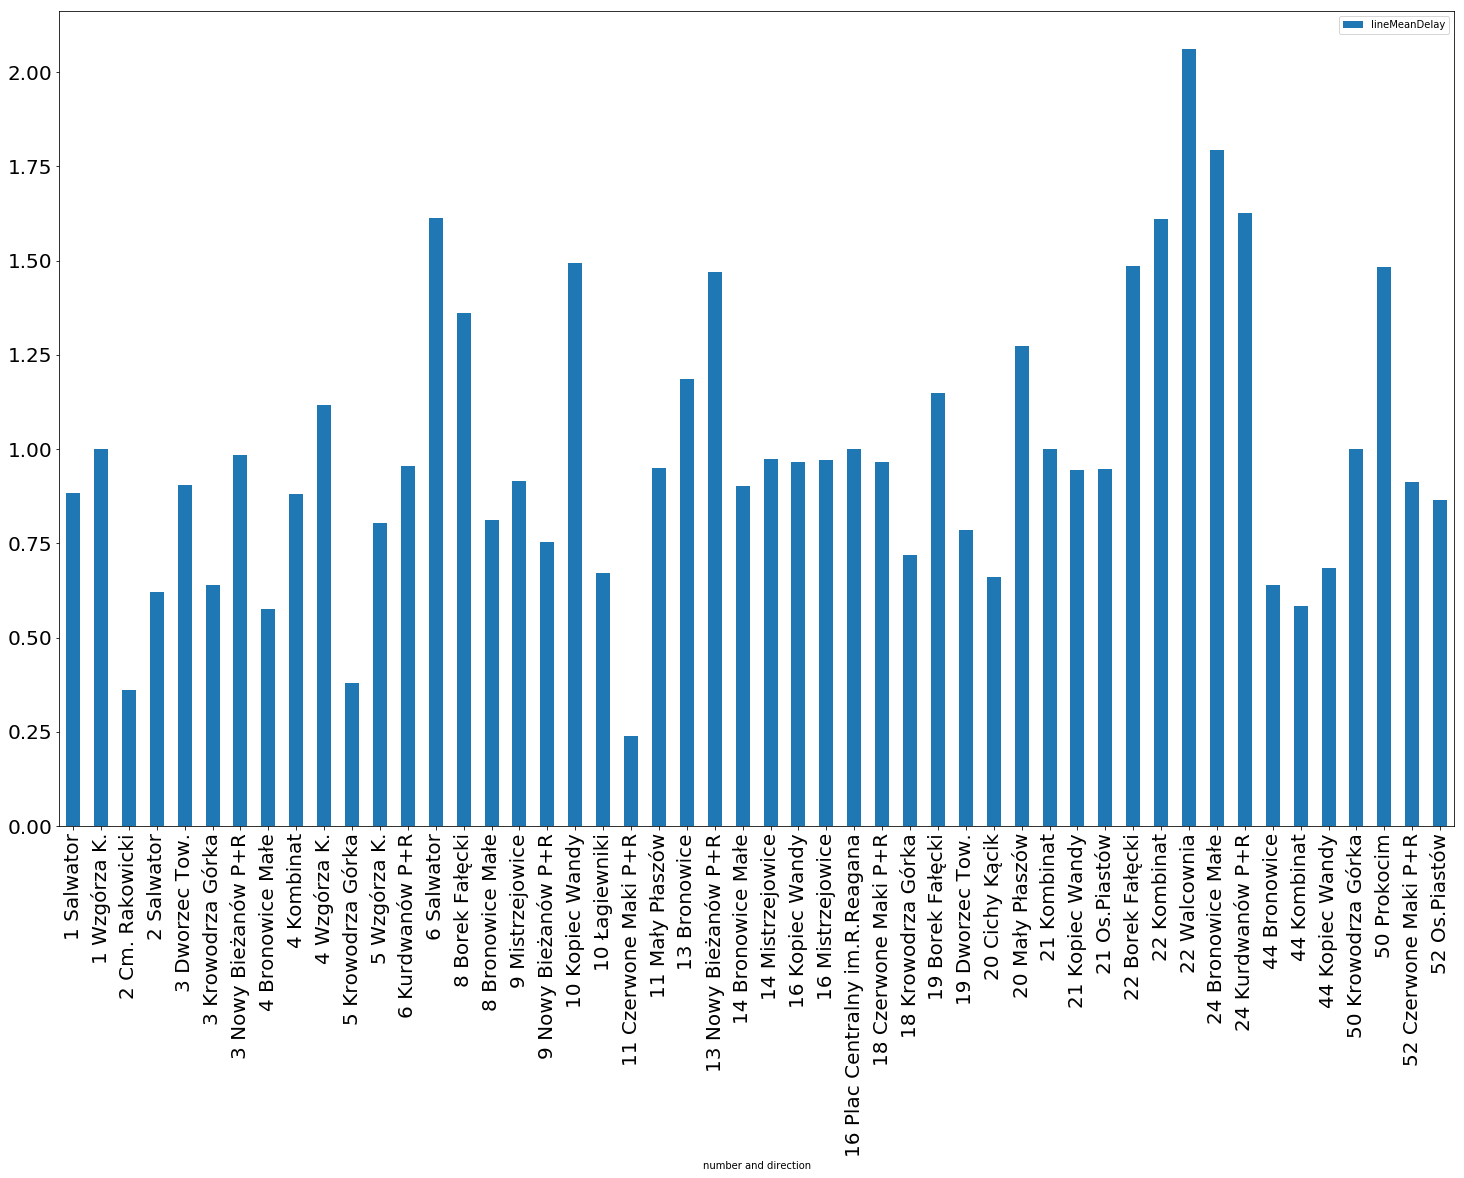

In [21]:
lineMeanDelay.plot(x='number and direction', y='lineMeanDelay', kind='bar', figsize=(25,15), fontsize=20)

# Model uczenia maszynowego

In [22]:
df25.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [23]:
#df25.apply(lambda x: '{} {}'.format(x['number'], x['direction']), axis = 1).head().factorize()[0]

In [24]:
df25['plannedTime'] = pd.to_datetime (df25['plannedTime'])
df25[['plannedTime']].info()

df25['plannedTime'].dt.hour.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71896 entries, 0 to 71895
Data columns (total 1 columns):
plannedTime    71896 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 561.8 KB


8     4583
7     4532
15    4501
6     4401
9     4336
18    4282
14    4149
16    4010
17    3964
19    3905
10    3885
13    3851
11    3849
12    3836
20    3398
5     3056
21    3029
22    2651
23    1293
4      367
0       18
Name: plannedTime, dtype: int64

In [25]:
df25['delay_secs'] = df25['delay'].map(lambda x: x*60)
df25['direction_cat'] = df25['direction'].factorize()[0]
df25['vehicleId'].fillna(-1, inplace = True)
df25['seq_num'].fillna(-1, inplace = True)

def gen_id_num_direction(x):
    return '{} {}'.format(x['number'], x['direction'])
df25['number_direction_id'] = df25.apply(gen_id_num_direction, axis = 1).factorize()[0]

def gen_id_stop_direction(x):
    return '{} {}'.format(x['stop'], x['direction'])
df25['stop_direction_id'] = df25.apply(gen_id_stop_direction, axis = 1).factorize()[0]

feats1 = [
    'number'
]
X1 = df25[ feats1 ].values

feats2 = [
    'number',
    'stop'
]
X2 = df25[ feats2 ].values

feats3 = [
    'number',
    'stop',
    'direction_cat'
]
X3 = df25[ feats3 ].values

feats4 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId'
]
X4 = df25[ feats4 ].values

feats5 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num'
]
X5 = df25[ feats5 ].values

feats6 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id'
]
X6 = df25[ feats6 ].values

feats7 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id'
]
X7 = df25[ feats7 ].values

y = df25['delay_secs'].values


model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_absolute_error')
scores2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_absolute_error')
scores3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_absolute_error')
scores4 = cross_val_score(model, X4, y, cv=5, scoring='neg_mean_absolute_error')
scores5 = cross_val_score(model, X5, y, cv=5, scoring='neg_mean_absolute_error')
scores6 = cross_val_score(model, X6, y, cv=5, scoring='neg_mean_absolute_error')
scores7 = cross_val_score(model, X7, y, cv=5, scoring='neg_mean_absolute_error')

In [26]:
Data = [(abs(np.mean(scores1))),
        (abs(np.mean(scores2))),
        (abs(np.mean(scores3))),
        (abs(np.mean(scores4))),
        (abs(np.mean(scores5))),
        (abs(np.mean(scores6))),
        (abs(np.mean(scores7)))]
        
df25 = pd.DataFrame(Data, index=['feats1','feats2','feats3','feats4','feats5','feats6','feats7'], columns=['np.mean'])

In [27]:
df25

,np.mean
feats1,54.299938
feats2,52.975194
feats3,50.564410
feats4,48.850661
feats5,47.477024
feats6,47.470479
feats7,47.451824


In [28]:
minVal25 = df25.min()
 
print('Minimum value is: ')
print(minVal25)


minValInd25 = df25.idxmin()
 
print("Min value is at row index position:")
print(minValInd25)

Minimum value is: 
np.mean    47.451824
dtype: float64
Min value is at row index position:
np.mean    feats7
dtype: object


In [29]:
feats7

['number',
 'stop',
 'direction_cat',
 'vehicleId',
 'seq_num',
 'number_direction_id',
 'stop_direction_id']

In [30]:
np.std(scores7)

3.795266640460962